# Demo on ``getObsAtmo`` usage, the emulator for atmospheric transparency at Astronomy Observation sites 

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2023/12/02
- update : 2024/08/27
- last update : 2025/06/15
- last update : 2025/10/15 : getObsAtmo version 0.2.0
- last update : 2025/10/17 : getObsAtmo version 0.2.2 with atmatmosphericmodels

This emulator is based from datagrid of atmospheric transparencies extracted from libradtran

**Goal** : How how to use getObsAtmo package to retrieve atmospheric transmission

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.rc = {'figure.dpi': 100}
import numpy as np

# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (12, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
#         'figure.dpi': 100
         }
plt.rcParams.update(params)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Imports

In [3]:
import getObsAtmo
from getObsAtmo.getObsAtmo import ObsAtmo,validateObsName,Dict_Of_sitesPressures,_getPackageDir,get_obssite_dataframe,get_obssite_keys,is_obssite

## Check information

### getObsAtmo version

In [4]:
print(f"{getObsAtmo.__name__} version {getObsAtmo._version.__version__}")

getObsAtmo version 0.2.2


In [5]:
the_version = getObsAtmo._version.__version__

### Dictionnary of pressures

In [6]:
Dict_Of_sitesPressures

{'LSST': 731.50433,
 'CTIO': 774.6052,
 'OHP': 937.22595,
 'ZTF': 823.60004,
 'VLT': 734.08038,
 'PDM': 710.90637,
 'OMK': 600.17224,
 'OSL': 1013.0}

### Choose Rubin-LSST observation sites but other sites may be chosen

In [7]:
obssitename = 'LSST'
obs_str = validateObsName(obssitename) 
std_pressure = Dict_Of_sitesPressures[obs_str]
new_pressure = Dict_Of_sitesPressures[obs_str]*1.1
print(new_pressure)

label1 = f"P = {std_pressure:.0f} hPa"
label2 = f"P = {new_pressure:.0f} hPa"

804.654763


In [8]:
emul1 =  ObsAtmo(obs_str= obssitename)
emul2 =  ObsAtmo(obs_str= obssitename,pressure = new_pressure)

# Typical transmission plot

- show a typical transmission plot

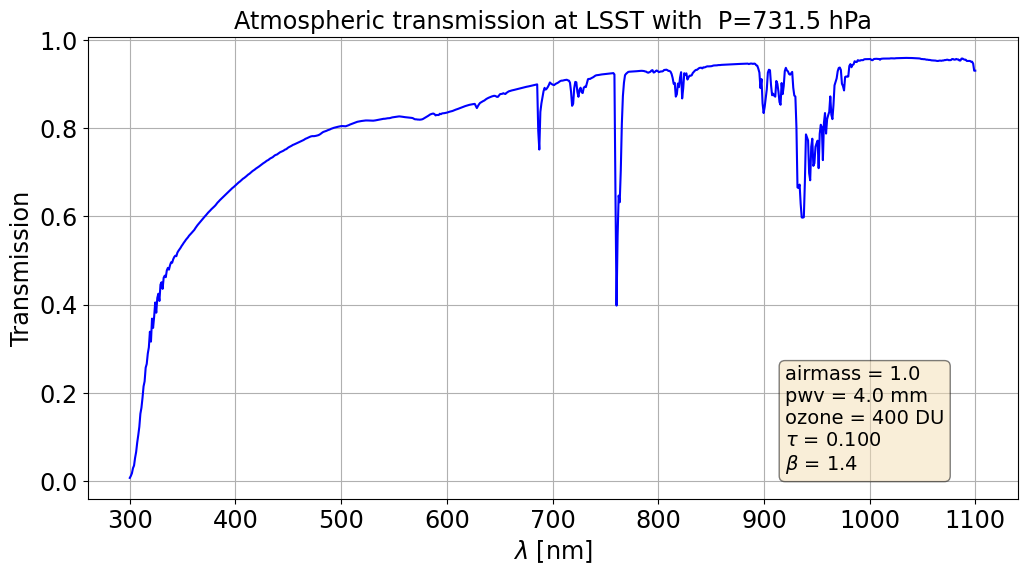

In [9]:
emul1.plot_transmission()

# Setting atmospheric parameters

In [10]:
WL = emul1.GetWL()

airmasses = emul1.AIRMASS
NAM = len(airmasses)
pwvs = emul1.PWV
NPWV = len(pwvs)
ozs = emul1.OZ
NOZ = len(ozs)

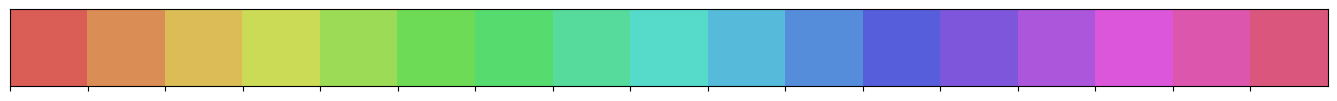

In [11]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

## Check emulator with Rayleigh scattering

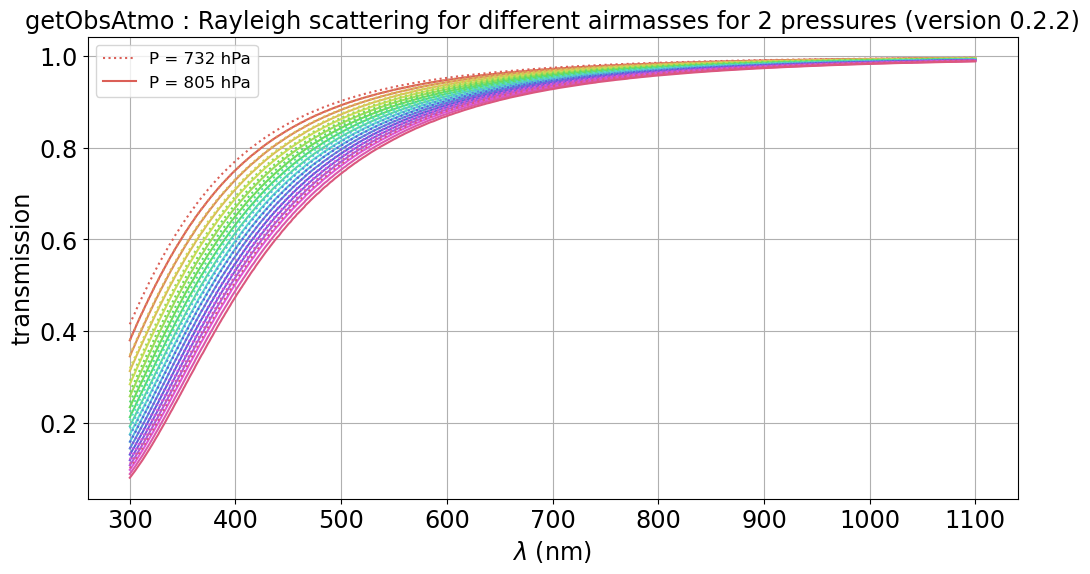

In [12]:
fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):

    transm1 = emul1.GetRayleighTransparencyArray(WL,am)
    transm2 = emul2.GetRayleighTransparencyArray(WL,am)
    
    if idx == 0:
        ax.plot(WL,transm1,":",color=hls_colors[idx],label=label1)
        ax.plot(WL,transm2,"-",color=hls_colors[idx],label=label2)
    else:
        ax.plot(WL,transm1,":",color=hls_colors[idx])
        ax.plot(WL,transm2,"-",color=hls_colors[idx])
    
title = f"{getObsAtmo.__name__} : Rayleigh scattering for different airmasses for 2 pressures (version {the_version})"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
fig.show()

## Check emulator with Oxygen O2 absorption

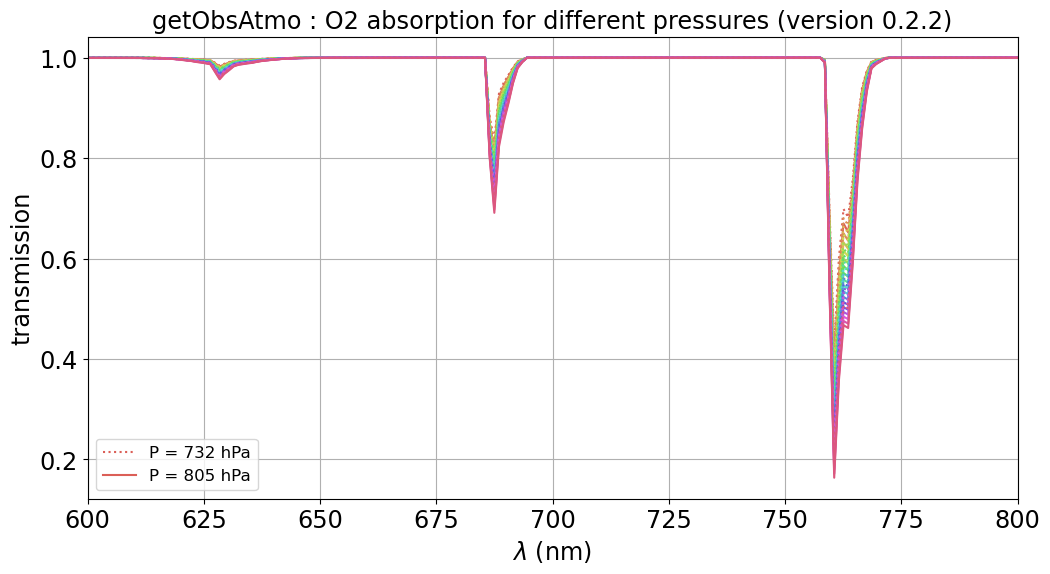

In [13]:
fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):

    transm1 = emul1.GetO2absTransparencyArray(WL,am)
    transm2 = emul2.GetO2absTransparencyArray(WL,am)
    
    if idx == 0:
        ax.plot(WL,transm1,":",color=hls_colors[idx],label=label1)
        ax.plot(WL,transm2,"-",color=hls_colors[idx],label=label2)
    else:
        ax.plot(WL,transm1,":",color=hls_colors[idx])
        ax.plot(WL,transm2,"-",color=hls_colors[idx])
        

title = f"{getObsAtmo.__name__} : O2 absorption for different pressures (version {the_version})"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(600.,800.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
fig.show()

### Zoom at the O2 abs line at 760 nm

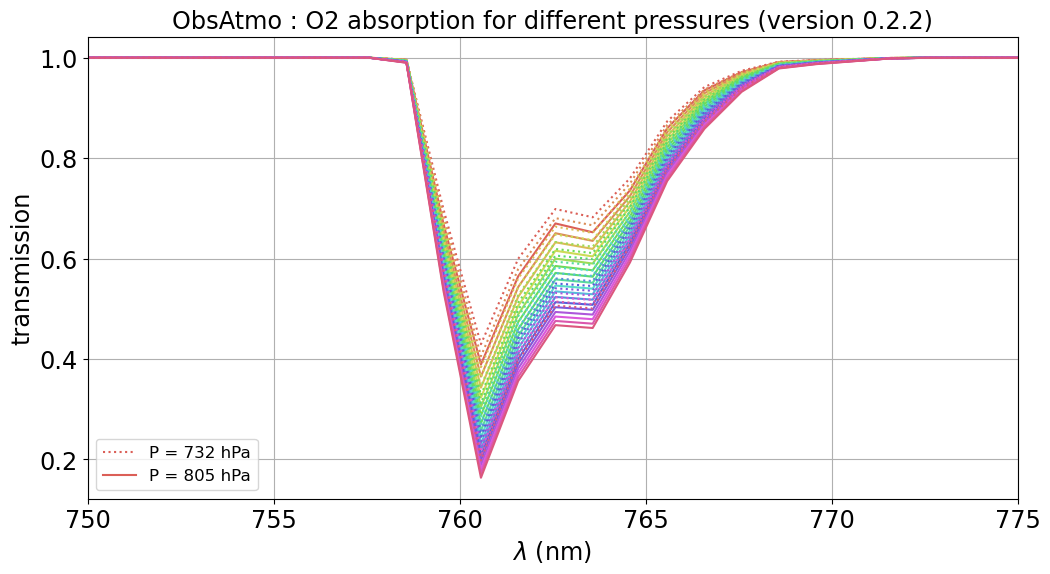

In [14]:
fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):

    transm1 = emul1.GetO2absTransparencyArray(WL,am)
    transm2 = emul2.GetO2absTransparencyArray(WL,am)
    
    if idx == 0:
        ax.plot(WL,transm1,":",color=hls_colors[idx],label=label1)
        ax.plot(WL,transm2,"-",color=hls_colors[idx],label=label2)
    else:
        ax.plot(WL,transm1,":",color=hls_colors[idx])
        ax.plot(WL,transm2,"-",color=hls_colors[idx])
        

title = f"ObsAtmo : O2 absorption for different pressures (version {the_version})"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(750.,775.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
fig.show()

## Check emulator with PWV absorption

Expect no difference

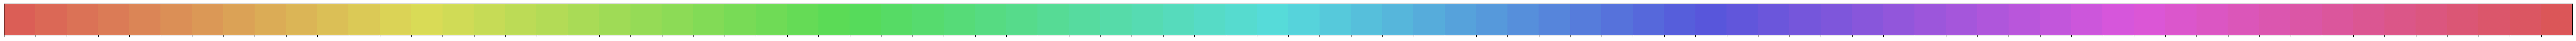

In [15]:
hls_colors = sns.color_palette("hls", NPWV)
sns.palplot(hls_colors)

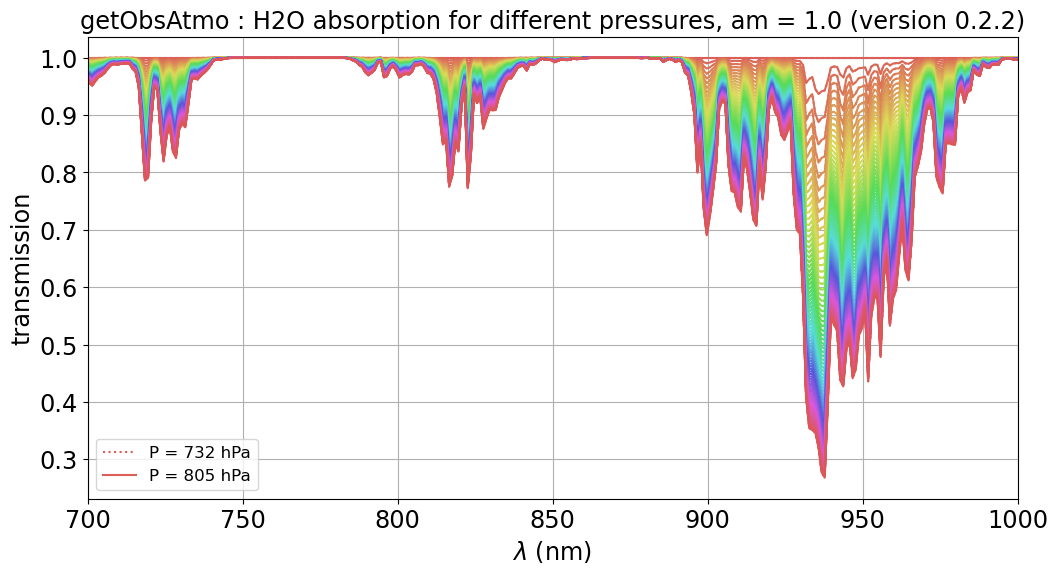

In [16]:
am =1

fig, ax = plt.subplots()
for idx,pwv in enumerate(pwvs):

    transm1 = emul1.GetPWVabsTransparencyArray(WL,am,pwv)
    transm2 = emul2.GetPWVabsTransparencyArray(WL,am,pwv)
    
    if idx == 0:
        ax.plot(WL,transm1,":",color=hls_colors[idx],label=label1)
        ax.plot(WL,transm2,"-",color=hls_colors[idx],label=label2)
    else:
        ax.plot(WL,transm1,":",color=hls_colors[idx])
        ax.plot(WL,transm2,"-",color=hls_colors[idx])
        

title = f"{getObsAtmo.__name__} : H2O absorption for different pressures, am = {am:.1f} (version {the_version})"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(700.,1000.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
fig.show()

## Check emulator with Ozone absorption

- expect no difference

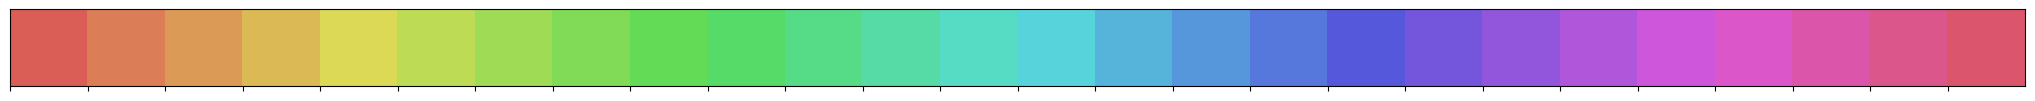

In [17]:
hls_colors = sns.color_palette("hls", NOZ)
sns.palplot(hls_colors)

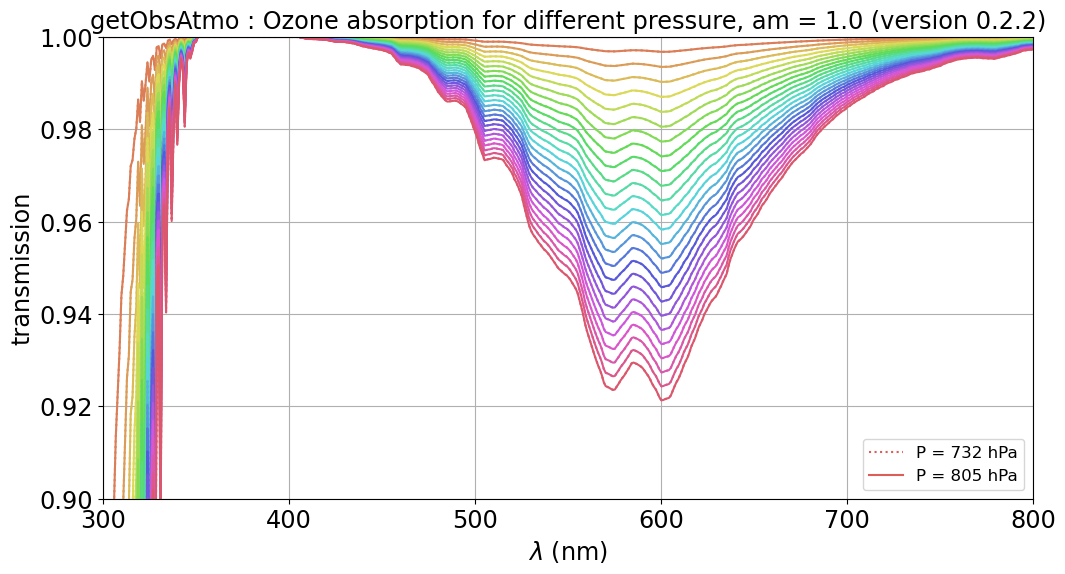

In [18]:
am =1

fig, ax = plt.subplots()
for idx,oz in enumerate(ozs):

    transm1 = emul1.GetOZabsTransparencyArray(WL,am,oz)
    transm2 = emul2.GetOZabsTransparencyArray(WL,am,oz)
    
    if idx == 0:
        ax.plot(WL,transm1,":",color=hls_colors[idx],label=label1)
        ax.plot(WL,transm2,"-",color=hls_colors[idx],label=label2)
    else:
        ax.plot(WL,transm1,":",color=hls_colors[idx])
        ax.plot(WL,transm2,"-",color=hls_colors[idx])
        

title = f"{getObsAtmo.__name__} : Ozone absorption for different pressure, am = {am:.1f} (version {the_version})"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(300.,800.)
ax.set_ylim(0.9,1.0)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
fig.show()

## Check emulator with combined ascattering and absorption process and check with libradtran

In [19]:
am0 = 1.0
pwv0 = 5.0
oz0 = 500.
transm1 = emul1.GetGriddedTransparencies(WL,am0,pwv0,oz0,flagRayleigh=True)
transm2 = emul2.GetGriddedTransparencies(WL,am0,pwv0,oz0,flagRayleigh=True)

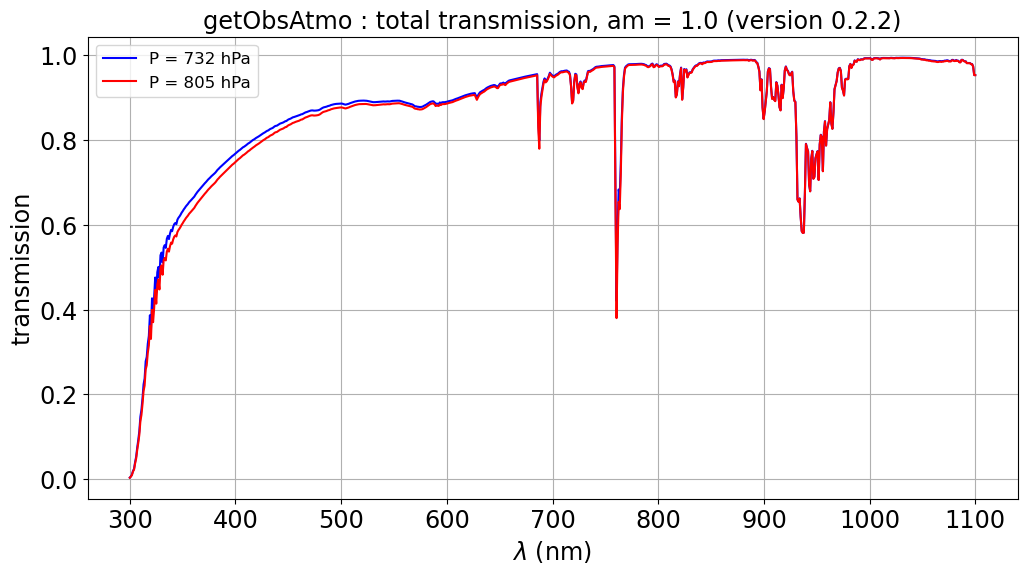

In [20]:
fig, ax = plt.subplots()

ax.plot(WL,transm1,'b-',label=label1)
ax.plot(WL,transm2,'r-',label=label2)

title = f"{getObsAtmo.__name__} : total transmission, am = {am0:.1f} (version {the_version})"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
fig.show()

## Check aerosols

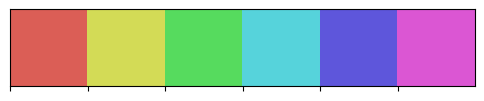

In [21]:
all_taus = np.arange(0,0.3,0.05)
NAER = len(all_taus) 
hls_colors = sns.color_palette("hls", NAER)
sns.palplot(hls_colors)

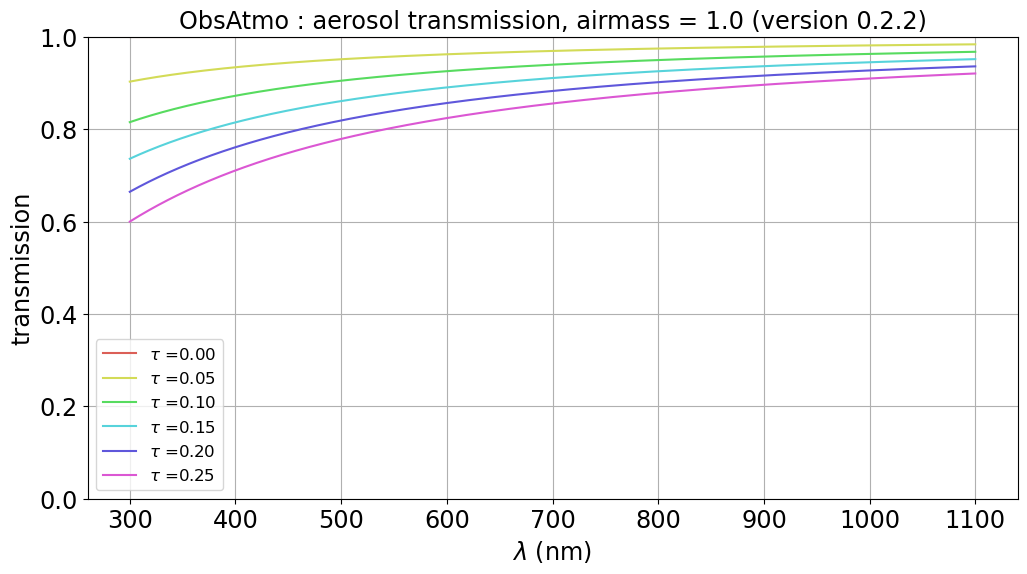

In [22]:
fig, ax = plt.subplots()
for index,tau in enumerate(all_taus):
    transm = emul1.GetAerosolsTransparencies(WL,am,tau) 
    label = r"$\tau$ =" + f"{tau:.2f}"
    ax.plot(WL,transm,color=hls_colors[index],label=label)
title = f"ObsAtmo : aerosol transmission, airmass = {am:.1f} (version {the_version})"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
ax.set_ylim(0,1)
fig.show()

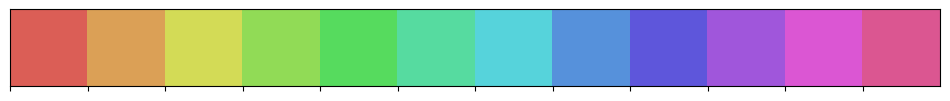

In [23]:
all_betas = np.arange(0.1,2.5,0.2)
NAER = len(all_betas) 
hls_colors = sns.color_palette("hls", NAER)
sns.palplot(hls_colors)
tau = 0.1

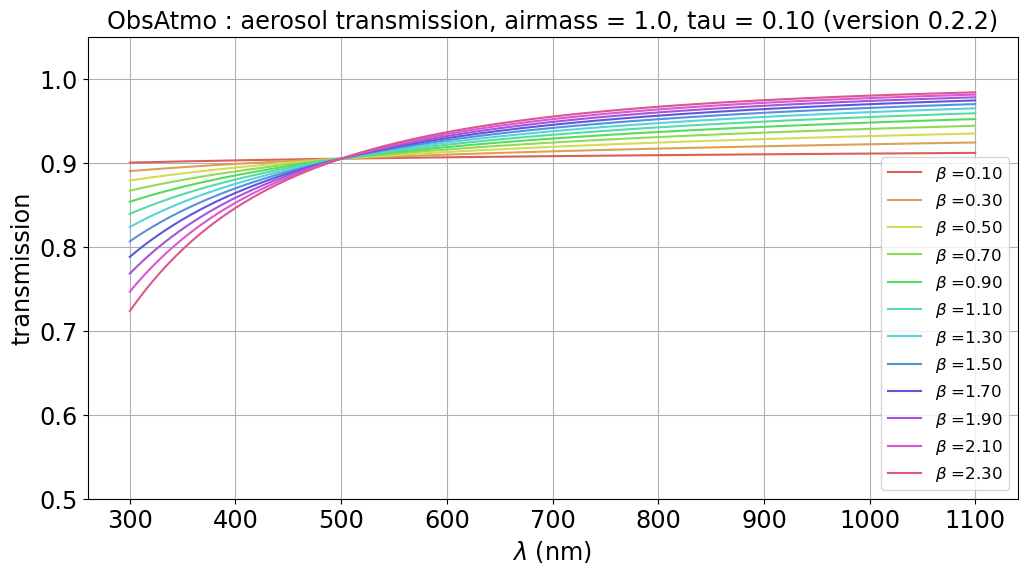

In [24]:
fig, ax = plt.subplots()
for index,beta in enumerate(all_betas):
    transm = emul1.GetAerosolsTransparencies(WL,am,tau,beta) 
    label = r"$\beta$ =" + f"{beta:.2f}"
    ax.plot(WL,transm,color=hls_colors[index],label=label)
title = f"ObsAtmo : aerosol transmission, airmass = {am:.1f}, tau = {tau:.2f} (version {the_version})"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
ax.set_ylim(0.5,1.05)
fig.show()

## The standard way to call atmospheric transmission

In [25]:
sorted_site_by_pressure = sorted(Dict_Of_sitesPressures.items(), key=lambda x:x[1])
sorted_site_by_pressure

[('OMK', 600.17224),
 ('PDM', 710.90637),
 ('LSST', 731.50433),
 ('VLT', 734.08038),
 ('CTIO', 774.6052),
 ('ZTF', 823.60004),
 ('OHP', 937.22595),
 ('OSL', 1013.0)]

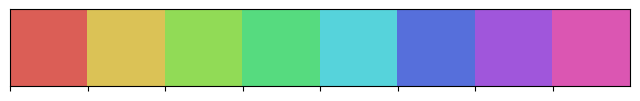

In [26]:
all_sites = sorted_site_by_pressure
NSites = len(all_sites)
hls_colors = sns.color_palette("hls", NSites)
sns.palplot(hls_colors)

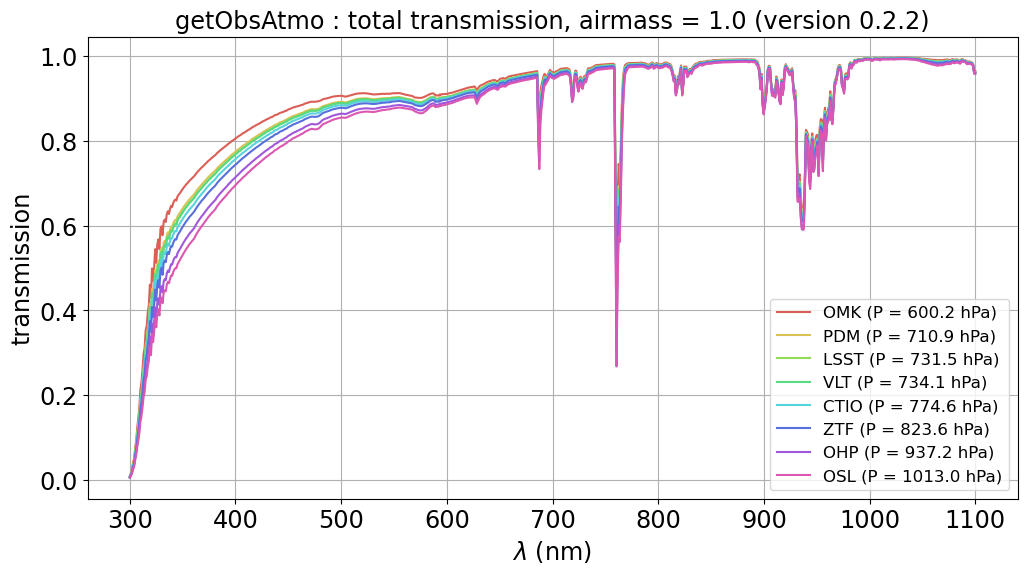

In [27]:
am=1
pwv = 4.0
oz= 400.
tau = 0.
beta = 3

fig, ax = plt.subplots()

for idx,site in enumerate(all_sites):

    obs_str = site[0]
    ref_press = site[1]
    
    emul = ObsAtmo(obs_str)
    pressure= emul.pressure
    
    label= f"{obs_str} (P = {pressure:.1f} hPa)"
    
    transm = emul.GetAllTransparencies(WL,am,pwv,oz,tau,beta)
    ax.plot(WL,transm,'-',color=hls_colors[idx],label=label)

title = f"{getObsAtmo.__name__} : total transmission, airmass = {am:.1f} (version {the_version})"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
fig.show()